In [1]:
# ***Outline***

This data set is a compilation state expenditure, student demographic, and 4th and 8th grade math and reading scores. This project is trying to create a model that can predict student scores based on these features.

# ***Data***

## ***Upload Data***

In [2]:
import sys
!conda install --yes --prefix {sys.prefix} numpy

/bin/bash: conda: command not found


In [3]:
import numpy as np

In [4]:
import os

In [5]:
import pandas as pd

In [6]:
finances = pd.read_csv("https://raw.githubusercontent.com/jiobu1/Unit-2-Build-Week/main/data/finance_states.csv")
states = pd.read_csv("https://raw.githubusercontent.com/jiobu1/Unit-2-Build-Week/main/data/states_all_extended.csv")

In [7]:
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [8]:
finances.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,1992_ALASKA,ALASKA,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [9]:
states.shape, finances.shape

((1492, 193), (1326, 13))

## ***Update Data***

### ***Merging Tail***

* merging the tail of both dataframes before concating

In [10]:
state_tail = pd.DataFrame(states.tail(51))
finance_tail = pd.DataFrame(finances.tail(51)) #I just need the last 51 rows

In [11]:
state_tail.shape, finance_tail.shape

((51, 193), (51, 13))

In [12]:
columns = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE',
           'STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
           'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']
state_tail = state_tail.drop(columns=columns) #Dropping unnecessary columns from state_tail, so I do not have to do this later

In [13]:
merge = pd.merge(finance_tail, state_tail, on=['PRIMARY_KEY','STATE', 'YEAR'])

In [14]:
merge.shape

(51, 193)

In [15]:
merge.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2017_ALABAMA,ALABAMA,2017,744930.0,7911674,811407,4350594,2749673,8031412,4046379,...,NaN,NaN,NaN,NaN,NaN,NaN,232.170688,268.312020,216.419814,257.686520
1,2017_ALASKA,ALASKA,2017,132737.0,2504501,350204,1600503,553794,2587060,1266077,...,NaN,NaN,NaN,NaN,NaN,NaN,230.456278,277.015572,207.037630,257.667497
2,2017_ARIZONA,ARIZONA,2017,936147.0,8677631,1178196,3446191,4053244,8389808,4081153,...,NaN,NaN,NaN,NaN,NaN,NaN,234.435788,282.248145,215.465952,262.957457
3,2017_ARKANSAS,ARKANSAS,2017,478996.0,5481422,597260,4137903,746259,5479899,2691959,...,NaN,NaN,NaN,NaN,NaN,NaN,233.848144,273.759907,216.108026,259.955798
4,2017_CALIFORNIA,CALIFORNIA,2017,6195344.0,91803968,7889546,51046506,32867916,90161939,44748095,...,NaN,NaN,NaN,NaN,NaN,NaN,232.262941,276.638200,215.421814,262.520630


### ***Concatenating Data***

In [16]:
head = states.head(1441)

In [17]:
df = head.append(merge)

# ***Data Exploration***

In [18]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [19]:
df.tail() #Checking that it merged correctly

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
46,2017_VIRGINIA,VIRGINIA,2017,1286711.0,16822120.0,1131679.0,6565670.0,9124771.0,17271169.0,9313733.0,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
47,2017_WASHINGTON,WASHINGTON,2017,1098187.0,15764749.0,1068053.0,9822674.0,4874022.0,16126035.0,7613934.0,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
48,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,273170.0,3490687.0,403856.0,1872045.0,1214786.0,3416235.0,1812983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
49,2017_WISCONSIN,WISCONSIN,2017,855924.0,12104649.0,802599.0,6197033.0,5105017.0,12026422.0,6043577.0,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304
50,2017_WYOMING,WYOMING,2017,93925.0,1932978.0,117807.0,1141557.0,673614.0,1927490.0,918465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,247.820619,288.761812,226.831211,269.371456


In [20]:
#How many observations are available
df.shape

(1492, 193)

In [21]:
#Are there any columns with null values?
df.isna().sum()

PRIMARY_KEY               0
STATE                     0
YEAR                      0
ENROLL                  212
TOTAL_REVENUE           161
                       ... 
GRADES_ALL_TRF         1166
AVG_MATH_4_SCORE        956
AVG_MATH_8_SCORE        960
AVG_READING_4_SCORE     959
AVG_READING_8_SCORE     994
Length: 193, dtype: int64

In [22]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.280000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.280000e+03,...,343.000000,343.000000,343.000000,343.000000,343.000000,326.000000,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.174300e+05,9.274162e+06,7.785491e+05,4.300729e+06,4.194885e+06,9.375933e+06,4.858815e+06,2.734451e+06,4.363877e+05,...,1028.244898,858.005831,688.883382,8177.699708,3181.918367,10159.435583,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.068204e+06,1.205160e+07,1.157786e+06,5.685300e+06,5.641828e+06,1.227319e+07,6.458443e+06,3.439435e+06,5.448701e+05,...,1342.500562,1137.723466,1010.942102,10627.763472,4529.779883,10692.452016,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.617798e+05,2.210191e+06,1.911455e+05,1.174059e+06,7.358395e+05,2.188797e+06,1.179241e+06,6.460350e+05,1.054122e+05,...,169.500000,122.000000,76.000000,1364.000000,398.000000,1884.250000,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.521425e+05,5.171631e+06,4.160630e+05,2.570987e+06,2.089445e+06,5.298267e+06,2.701637e+06,1.545738e+06,2.764680e+05,...,557.000000,442.000000,350.000000,4726.000000,1572.000000,6454.500000,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014540e+06,1.111990e+07,8.462290e+05,5.185174e+06,4.843230e+06,1.087317e+07,5.641158e+06,3.317215e+06,5.267228e+05,...,1353.000000,1076.500000,857.000000,10444.000000,3987.000000,13967.000000,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,9.180397e+07,9.990221e+06,5.104651e+07,3.800098e+07,9.016194e+07,4.514133e+07,2.757241e+07,4.211532e+06,...,9149.000000,7131.000000,6890.000000,71139.000000,28985.000000,49175.000000,253.420961,300.568235,236.773867,280.499130


All columns, except State and Primary Key, are numeric. This means that other than data cleaning, I can try all the columns since these are not high cardinality categorical columns.

# ***Choose your evaluation metric(s)***

In [23]:
target_df = df[['PRIMARY_KEY','STATE','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE' ]].copy()
target_df.head()

,PRIMARY_KEY,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,208.398961,260.892247,196.764414,NaN


Using 8th grade reading. Creating a classification class by grouping the scores into different categories. I think this will give more information then the numeric values.

Noticings: Unfortunately, the state scores are not very good for any of the states for any of the years. Most states, across both Math and Reading, have underperformed; only a small percentage scored proficient.

## 8th Grade Reading

### ***Data Cleaning***

In [24]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_READING_8_SCORE'] = target_df.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [25]:
target_df['AVG_READING_8_SCORE'].isnull().sum()

161

In [26]:
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].fillna(0)
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].astype(int)
target_df['AVG_READING_8_SCORE']

0     264
1     258
2     262
3     264
4     261
     ... 
46    273
47    267
48    271
49    258
50    269
Name: AVG_READING_8_SCORE, Length: 1492, dtype: int64

In [27]:
target_df['AVG_READING_8_SCORE'].value_counts()

264    218
263    191
265    163
0      161
262    134
261    117
266    105
260     70
267     47
259     35
268     34
269     32
270     21
257     19
258     18
272     14
251     13
255     12
253     11
254     10
271      9
273      9
256      8
252      7
274      7
250      6
275      3
277      3
276      2
242      2
238      2
247      2
239      1
240      1
246      1
248      1
249      1
236      1
280      1
Name: AVG_READING_8_SCORE, dtype: int64

In [28]:
min(target_df['AVG_READING_8_SCORE']), max(target_df['AVG_READING_8_SCORE'])

(0, 280)

NAEP Reading Score Breakdown
- basic (0-280)
> This column was broken down into 3 categories: 
> - low, 
> - mid, and 
> - high basic
- proficient (281-322)
- advanced (323-500)

In [29]:
def proficiency(row):
  #separating basic into 3 groups (0-281)
    if 0< row['AVG_READING_8_SCORE'] < 240:
        val = '1'
    elif 240 <= row['AVG_READING_8_SCORE'] < 265:
        val = '2'
    elif 265 <= row['AVG_READING_8_SCORE'] < 281:
        val = '3'
    elif 281 <= row['AVG_READING_8_SCORE'] < 323:
        val = '4'
    elif row['AVG_READING_8_SCORE'] >= 323:
        val = '5'
    else:
        val = 0
    return val

target_df['READING_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['READING_PROF_8'].astype('int')

0     2
1     2
2     2
3     2
4     2
     ..
46    3
47    3
48    3
49    2
50    3
Name: READING_PROF_8, Length: 1492, dtype: int64

In [30]:
target_df['READING_PROF_8'].value_counts()

2    877
3    450
0    161
1      4
Name: READING_PROF_8, dtype: int64

In [31]:
target_df['READING_PROF_8'].value_counts(normalize=True)

2    0.587802
3    0.301609
0    0.107909
1    0.002681
Name: READING_PROF_8, dtype: float64

## 8th Grade Math

### ***Data Cleaning***

In [32]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_MATH_8_SCORE'] = target_df.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [33]:
target_df['AVG_MATH_8_SCORE'].isnull().sum()

161

In [34]:
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].fillna(0)
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].astype(int)
target_df['AVG_MATH_8_SCORE']

0     252
1     280
2     265
3     256
4     260
     ... 
46    290
47    289
48    273
49    288
50    288
Name: AVG_MATH_8_SCORE, Length: 1492, dtype: int64

In [35]:
target_df['AVG_MATH_8_SCORE'].value_counts()

0      161
283    115
282    101
280     72
287     68
273     60
277     57
288     55
285     54
284     54
279     49
275     47
286     47
274     46
278     46
270     45
281     44
269     40
271     28
289     27
272     25
262     25
290     24
266     24
291     23
265     23
263     21
250     18
276     13
268     11
267      7
294      6
292      6
260      5
259      5
261      4
264      4
293      4
258      3
234      2
297      2
295      2
298      2
296      2
252      2
253      2
256      2
243      1
245      1
246      1
248      1
249      1
254      1
257      1
232      1
300      1
Name: AVG_MATH_8_SCORE, dtype: int64

In [36]:
min(target_df['AVG_MATH_8_SCORE']), max(target_df['AVG_MATH_8_SCORE'])

(0, 300)

NAEP Math Score Breakdown
- basic (0-298)
> This column was broken down into 3 categories:
> -  low, 
> - mid, and 
> - high basic
- proficient (298-332)
- advanced (333-500)

In [37]:
def proficiency(row):
    if 0 < row['AVG_MATH_8_SCORE'] < 270:
        val = '1'
    elif 270 <= row['AVG_MATH_8_SCORE'] < 280:
        val = '2 '
    elif 280 <= row['AVG_MATH_8_SCORE'] < 299:
        val = '3'    
    elif 299 <= row['AVG_MATH_8_SCORE'] < 333:
        val = '4'
    elif row['AVG_MATH_8_SCORE'] >= 333:
        val = '5'
    else:
        val = 0
    return val

target_df['MATH_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['MATH_PROF_8'].astype('int')

0     1
1     3
2     1
3     1
4     1
     ..
46    3
47    3
48    2
49    3
50    3
Name: MATH_PROF_8, Length: 1492, dtype: int64

In [38]:
target_df['MATH_PROF_8'].value_counts(normalize=True)

3     0.474531
2     0.278820
1     0.138070
0     0.107909
4     0.000670
Name: MATH_PROF_8, dtype: float64

# ***Target***

Adding the two new engineered features back into the dataframe

In [39]:
df = df.drop(columns = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE'])

In [40]:
df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8', 'MATH_PROF_8']] = target_df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8','MATH_PROF_8' ]].copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_8_SCORE,READING_PROF_8,MATH_PROF_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,208.327876,207.963517,264,252,2,1
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,258,280,2,3
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,215.253932,206.212716,262,265,2,1
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,210.206028,208.634458,264,256,2,1
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,208.398961,196.764414,261,260,2,1


In [41]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

In [42]:
df.dtypes

PRIMARY_KEY             object
STATE                   object
YEAR                     int64
ENROLL                 float64
TOTAL_REVENUE          float64
                        ...   
AVG_READING_4_SCORE    float64
AVG_READING_8_SCORE      int64
AVG_MATH_8_SCORE         int64
READING_PROF_8           int64
MATH_PROF_8              int64
Length: 195, dtype: object

# ***Train/Val/Test***

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train = df[df['YEAR'] <= 2013]
test = df[df['YEAR'] > 2013]
train.shape, test.shape

((1277, 195), (215, 195))

In [45]:
train, val = train_test_split(
    train, train_size=0.60, test_size=0.40,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((766, 195), (511, 195), (215, 195))

### ***Cleaning Data***

TO DO:
- There are several columns that do not have any data. 

**DROP**
- primary key (this is just a combination of state and year
- Since this model is trying to predict scores for each state, I will be dropping the years that do not have any recorded scores. 
- This data contains information for all 50 states, including Washington D.C, as well as US territories. Unfortunately, there is not information about expenditure for those columns, so that information will be dropped as well. 
- I will create a new dataframe which has the breakdown of demographics and then delete those columns from this dataframe. The demographics info was not captured until 2009, that will be too many np.nan values to use to build a useful model. 



In [46]:
train.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF',
       'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'AVG_MATH_8_SCORE', 'READING_PROF_8', 'MATH_PROF_8'],
      dtype='object', length=195)

### ***Feature Engineering***

- For this dataset, I would delete the years where the NAEP test scores are not available since that does not give anything for me to train/validate/test the data on. The data is from 1992 - 2017. The NAEP only gives information for the years 1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017. ✓
- I will also delete the years where I do not have the finacial information available ✓
- I am using information from the consumer price index to create new columns that adjust revenue and expenditures to reflect inflation ✓
- look at %of total revenue spent on education✓
- look at % of total expenditure spent on instruction, support other, and capital outlay✓

#### State Averages
* replacing nulls with state averages

In [47]:
train.groupby('STATE').mean()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_8_SCORE,READING_PROF_8,MATH_PROF_8
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2002.900000,733965.900000,5.500469e+06,568936.200000,3.194067e+06,1.737466e+06,5.624908e+06,2.914756e+06,1.620027e+06,451126.900000,...,NaN,NaN,NaN,NaN,225.645299,210.408278,264.700000,263.000000,2.200000,1.000000
ALASKA,2004.333333,130848.733333,1.691878e+06,265068.933333,1.021510e+06,4.052985e+05,1.819245e+06,8.951511e+05,6.266891e+05,58791.533333,...,263.20,3073.800000,1166.2,4334.200000,234.186236,210.913963,263.800000,280.200000,2.333333,2.800000
AMERICAN_SAMOA,2002.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
ARIZONA,2003.176471,875459.062500,6.549546e+06,783975.470588,2.760691e+06,3.004879e+06,6.605608e+06,3.032112e+06,2.051728e+06,323763.562500,...,480.75,5919.250000,2277.0,8251.250000,227.348464,208.783949,263.176471,274.176471,2.176471,1.882353
ARKANSAS,2002.000000,437997.083333,3.259555e+06,371155.769231,2.305379e+06,5.830208e+05,3.387348e+06,1.724709e+06,1.005450e+06,254008.833333,...,188.00,2359.000000,879.5,3341.750000,226.369523,213.676209,264.538462,268.692308,2.307692,1.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRGIN_ISLANDS,2003.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.00,33.000000,44.5,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
WASHINGTON,2001.866667,995417.000000,8.413861e+06,657610.466667,5.289223e+06,2.467028e+06,8.648341e+06,4.227706e+06,2.509973e+06,377268.466667,...,1753.00,17804.000000,7526.5,25543.500000,240.417536,222.917322,264.933333,284.666667,2.933333,3.000000
WEST_VIRGINIA,2002.666667,293047.888889,2.608390e+06,262479.777778,1.534276e+06,8.116347e+05,2.557555e+06,1.413668e+06,7.827014e+05,167582.555556,...,55.50,1566.500000,278.0,2077.000000,229.120583,216.162878,265.888889,269.111111,2.888889,1.222222


#### Adjustment for Inflation
I am using information from the consumer price index to create new columns that adjust expenditures to reflect inflation ✓
* https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/
* https://www.usinflationcalculator.com/frequently-asked-questions-faqs/#HowInflationCalculatorWorks

In [48]:
import numpy as np

In [49]:
cpi = {1992: 140.3,
       1993: 144.5,
       1994: 148.2,
       1995: 152.4,
       1996: 156.9,
       1997: 160.5,
       1998: 163.0,
       1999: 166.6,
       2000: 172.2,
       2001: 177.1,
       2002: 179.9,
       2003: 184.0,
       2004: 188.9,
       2005: 195.3,
       2006: 201.6,
       2007: 207.3,
       2008: 215.303,
       2009: 214.537,
       2010: 218.056,
       2011: 224.939,
       2012: 229.594,
       2013: 232.957,
       2014: 236.736,
       2015: 237.017,
       2016: 240.007,
       2017: 245.120,
       2018: 251.107,
       2019: 255.657}

In [50]:
baseline_year = 2019
baseline_inflation = cpi[baseline_year]
print(baseline_inflation)

255.657


In [51]:
def inflation_adjustment(row, baseline_inflation, src):
    return row[src] * (baseline_inflation/ cpi[row['YEAR']])

### ***Wrangle***

In [52]:
import numpy as np

In [53]:
def wrangle(X):
    # Prevent SettingWithCopyWarning
    X = X.copy()

    X = X.replace (0, np.NaN)

    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    #Dropping rows if they do not contain any score data, will not drop if there is just 1 value
    X = X.dropna(axis=0, subset=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], how = 'any')

    #Dropping rows that do not contain any financial information
    X = X.dropna(axis=0, subset = ['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE'], how = 'all')

    #Dropping columns
    #Primary Key is just State and Year
    #Dropping breakdown of demographics into male/female because this does not start to get recorded until 2009
    drop = ['PRIMARY_KEY',
            'GRADES_PK_HP','GRADES_KG_HP','GRADES_4_HP','GRADES_8_HP','GRADES_12_HP', 'GRADES_1_8_HP', 'GRADES_9_12_HP', 'GRADES_ALL_HP',
            'GRADES_PK_TR','GRADES_KG_TR','GRADES_4_TR','GRADES_8_TR','GRADES_12_TR', 'GRADES_1_8_TR', 'GRADES_9_12_TR', 'GRADES_ALL_TR',
            'GRADES_PK_AMM','GRADES_KG_AMM','GRADES_4_AMM','GRADES_8_AMM','GRADES_12_AMM', 'GRADES_1_8_AMM', 'GRADES_9_12_AMM', 'GRADES_ALL_AMM',
            'GRADES_PK_AMF','GRADES_KG_AMF','GRADES_4_AMF','GRADES_8_AMF','GRADES_12_AMF', 'GRADES_1_8_AMF', 'GRADES_9_12_AMF', 'GRADES_ALL_AMF',
            'GRADES_PK_ASM','GRADES_KG_ASM','GRADES_4_ASM','GRADES_8_ASM','GRADES_12_ASM', 'GRADES_1_8_ASM', 'GRADES_9_12_ASM', 'GRADES_ALL_ASM',
            'GRADES_PK_ASF','GRADES_KG_ASF','GRADES_4_ASF','GRADES_8_ASF','GRADES_12_ASF', 'GRADES_1_8_ASF', 'GRADES_9_12_ASF', 'GRADES_ALL_ASF',
            'GRADES_PK_HIM','GRADES_KG_HIM','GRADES_4_HIM','GRADES_8_HIM','GRADES_12_HIM', 'GRADES_1_8_HIM', 'GRADES_9_12_HIM', 'GRADES_ALL_HIM',
            'GRADES_PK_HIF','GRADES_KG_HIF','GRADES_4_HIF','GRADES_8_HIF','GRADES_12_HIF', 'GRADES_1_8_HIF', 'GRADES_9_12_HIF', 'GRADES_ALL_HIF',
            'GRADES_PK_BLM','GRADES_KG_BLM','GRADES_4_BLM','GRADES_8_BLM','GRADES_12_BLM', 'GRADES_1_8_BLM', 'GRADES_9_12_BLM', 'GRADES_ALL_BLM',
            'GRADES_PK_BLF','GRADES_KG_BLF','GRADES_4_BLF','GRADES_8_BLF','GRADES_12_BLF', 'GRADES_1_8_BLF', 'GRADES_9_12_BLF', 'GRADES_ALL_BLF',
            'GRADES_PK_WHM','GRADES_KG_WHM','GRADES_4_WHM','GRADES_8_WHM','GRADES_12_WHM', 'GRADES_1_8_WHM', 'GRADES_9_12_WHM', 'GRADES_ALL_WHM',
            'GRADES_PK_WHF','GRADES_KG_WHF','GRADES_4_WHF','GRADES_8_WHF','GRADES_12_WHF', 'GRADES_1_8_WHF', 'GRADES_9_12_WHF', 'GRADES_ALL_WHF',
            'GRADES_PK_HPM','GRADES_KG_HPM','GRADES_4_HPM','GRADES_8_HPM','GRADES_12_HPM', 'GRADES_1_8_HPM', 'GRADES_9_12_HPM', 'GRADES_ALL_HPM',
            'GRADES_PK_HPF','GRADES_KG_HPF','GRADES_4_HPF','GRADES_8_HPF','GRADES_12_HPF', 'GRADES_1_8_HPF', 'GRADES_9_12_HPF', 'GRADES_ALL_HPF',
            'GRADES_PK_TRM','GRADES_KG_TRM','GRADES_4_TRM','GRADES_8_TRM','GRADES_12_TRM', 'GRADES_1_8_TRM', 'GRADES_9_12_TRM', 'GRADES_ALL_TRM',
            'GRADES_PK_TRF','GRADES_KG_TRF','GRADES_4_TRF','GRADES_8_TRF','GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF']
    X = X.drop(columns=drop)

    #Filling missing scores with state average
    X['AVG_READING_8_SCORE'] = X.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_MATH_8_SCORE'] = X.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_READING_4_SCORE'] = X.groupby('STATE')['AVG_READING_4_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_MATH_4_SCORE'] = X.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))

    #Adjusting revenue and expenditures to reflect inflation
    #Revenue
    X['ADJUSTED_TOTAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'TOTAL_REVENUE'),axis=1)
    X['ADJUSTED_FEDERAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'FEDERAL_REVENUE'),axis=1)
    X['ADJUSTED_STATE_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'STATE_REVENUE'),axis=1)
    X['ADJUSTED_LOCAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'LOCAL_REVENUE'),axis=1)

    #Expenditures
    X['ADJUSTED_TOTAL_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'TOTAL_EXPENDITURE'),axis=1)
    X['ADJUSTED_INSTRUCTION_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'INSTRUCTION_EXPENDITURE'),axis=1)
    X['ADJUSTED_SUPPORT_SERVICES_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'SUPPORT_SERVICES_EXPENDITURE'),axis=1)
    X['ADJUSTED_OTHER_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'OTHER_EXPENDITURE'),axis=1)
    X['ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'CAPITAL_OUTLAY_EXPENDITURE'),axis=1)
    
    #Calculating Percentages
    #%of total revenue spent on education
    X['%TOTAL_REVENUE'] = X['TOTAL_EXPENDITURE']/X['TOTAL_REVENUE']

    #% of total expenditure spent on instruction
    X['%TOTAL_EXPENDITURE_INSTRUCTION'] = X['INSTRUCTION_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_SUPPORT_SERVICES'] = X['SUPPORT_SERVICES_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_OTHER'] = X['OTHER_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_CAPITAL_OUTLAY'] = X['CAPITAL_OUTLAY_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    
    #Cost per student
    # Used the enroll column - this is derived from the US Census
    # instead of the GRADES_ALL_G which is recorded by NAEP
    X['COST_PER_STUDENT'] = X['TOTAL_EXPENDITURE']/X['ENROLL']
    
    #Change year column to year
    X['YEAR'] = pd.to_datetime(X['YEAR'], infer_datetime_format = True)
    X['YEAR'] = X['YEAR'].dt.year
    
    #Return the wrangled dataframe
    return X

In [54]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test) 

train.shape, val.shape, test.shape

((251, 81), (171, 81), (102, 81))

In [55]:
train.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
920,WISCONSIN,1970,867035.0,10991081.0,1258519.0,4785070.0,4947492.0,10880480.0,5857285.0,3382519.0,...,6.979942e+06,4.030842e+06,5.640108e+05,7.731629e+05,0.989937,0.538330,0.310880,0.043499,0.059630,12.549067
591,NEW_JERSEY,1970,1350330.0,19785039.0,797717.0,8135014.0,10852308.0,19812932.0,10169992.0,6429003.0,...,1.413060e+07,8.932715e+06,9.410234e+05,2.259859e+06,1.001410,0.513301,0.324485,0.034183,0.082090,14.672659
1013,RHODE_ISLAND,1970,139157.0,2212352.0,234111.0,768713.0,1209528.0,2198940.0,1260021.0,736651.0,...,1.432091e+06,8.372491e+05,1.066322e+05,4.969729e+04,0.993938,0.573013,0.335003,0.042666,0.019885,15.801864
596,OHIO,1970,1803966.0,18018740.0,1097349.0,7844992.0,9076399.0,18760200.0,8958790.0,6097596.0,...,1.244770e+07,8.472245e+06,1.112844e+06,3.229254e+06,1.041149,0.477542,0.325028,0.042693,0.123887,10.399420
1104,NEVADA,1970,431776.0,4131800.0,392009.0,2556472.0,1183319.0,4057443.0,2058538.0,1396907.0,...,2.259128e+06,1.533026e+06,1.830688e+05,2.438090e+05,0.982004,0.507349,0.344283,0.041113,0.054754,9.397102


In [56]:
train.STATE.nunique(), val.STATE.nunique(), test.STATE.nunique()

(51, 50, 51)

### ***Baseline***

In [57]:
train['READING_PROF_8'].value_counts(normalize=True)

2.0    0.505976
3.0    0.486056
1.0    0.007968
Name: READING_PROF_8, dtype: float64

My baseline is ~50% for my majority class 2

# Test Model

## ***Random Forest***

In [58]:
import category_encoders as ce

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [59]:
columns=['COST_PER_STUDENT','AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 
         'ADJUSTED_TOTAL_EXPENDITURE', 'ENROLL', '%TOTAL_EXPENDITURE_INSTRUCTION', 
         '%TOTAL_EXPENDITURE_SUPPORT_SERVICES', 'ADJUSTED_OTHER_EXPENDITURE']
target = 'READING_PROF_8'

X_train_new = train[columns]
y_train = train[target]
X_val_new = val[columns]
y_val = val[target]
X_test_new = test[columns]
y_test = test[target]

In [60]:
#Make Pipeline
new_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                           class_weight=None, criterion='entropy',
                           max_depth=10.0, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.2,
                           min_samples_split=0.7000000000000001,
                           min_weight_fraction_leaf=0.0,
                           n_estimators=1600, n_jobs=None,
                           oob_score=False, random_state=27,
                           verbose=0, warm_start=False))

In [61]:
# Fit on train, score on val
new_pipeline.fit(X_train_new, y_train)
print('Validation Accuracy', new_pipeline.score(X_val_new, y_val))

Validation Accuracy 0.52046783625731


In [62]:
# Test
print('Test Accuracy', new_pipeline.score(X_test_new, y_test))

Test Accuracy 0.6274509803921569


## Visualize Features

In [63]:
processor = make_pipeline(
    SimpleImputer(strategy = 'mean')
)

In [64]:
X_train_processed = processor.fit_transform(X_train_new)
X_val_processed = processor.transform(X_val_new)
X_test_processed = processor.transform(X_test_new)

In [65]:
X_train_processed.shape, X_val_processed.shape, X_test_processed.shape

((251, 8), (171, 8), (102, 8))

In [66]:
model_rf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                           class_weight=None, criterion='entropy',
                           max_depth=10.0, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.2,
                           min_samples_split=0.7000000000000001,
                           min_weight_fraction_leaf=0.0,
                           n_estimators=1600, n_jobs=None,
                           oob_score=False, random_state=27,
                           verbose=0, warm_start=False)


In [67]:
model_rf.fit(X_train_processed, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10.0, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.2,
                       min_samples_split=0.7000000000000001,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

In [68]:
model_rf.score(X_val_processed, y_val)

0.52046783625731

In [69]:
model_rf.score(X_test_processed, y_test)

0.6274509803921569

### Confusion Matrix

A **confusion matrix** is a table that is used to evaluate the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [70]:
# pip install scikit-plot

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
y_pred = model_rf.predict(X_val_processed)

In [73]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[ 0  0  2]
 [ 0 49 43]
 [ 0 37 40]]


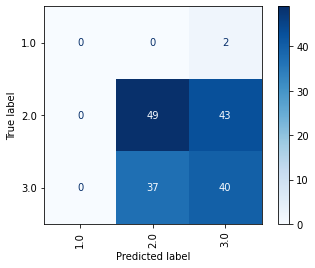

In [74]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_rf, X_val_processed, y_val, 
                      xticks_rotation='vertical', 
                      values_format='.0f',
                      cmap='Blues');

### Permutation Importances

In [75]:
# !pip install eli5

In [76]:
import eli5

In [77]:
from eli5.sklearn import PermutationImportance

In [78]:
permuter = PermutationImportance(
    model_rf,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_processed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=10.0,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=0.2,
                                                       min_samples_split=0.7000000000000001,
                                             

In [79]:
permuter.feature_importances_

array([ 4.44089210e-17,  7.71929825e-02,  1.16959064e-03, -1.75438596e-02,
       -7.01754386e-03, -1.63742690e-02,  4.67836257e-03, -1.75438596e-02])

In [80]:
eli5.show_weights(
    permuter,
    top = None,
    feature_names = X_val_new.columns.to_list()
)

Weight,Feature
0.0772 ± 0.0482,AVG_MATH_4_SCORE
0.0047 ± 0.0187,%TOTAL_EXPENDITURE_SUPPORT_SERVICES
0.0012 ± 0.0047,AVG_READING_4_SCORE
0.0000 ± 0.0105,COST_PER_STUDENT
-0.0070 ± 0.0047,ENROLL
-0.0164 ± 0.0155,%TOTAL_EXPENDITURE_INSTRUCTION
-0.0175 ± 0.0245,ADJUSTED_OTHER_EXPENDITURE
-0.0175 ± 0.0277,ADJUSTED_TOTAL_EXPENDITURE


## Partial Dependence Plot

In [81]:
# !pip install pdpbox

In [82]:
import matplotlib.pyplot as plt

In [83]:
plt.rcParams['figure.dpi'] = 72

In [84]:
X_train_new.isna().sum()

COST_PER_STUDENT                       23
AVG_MATH_4_SCORE                        0
AVG_READING_4_SCORE                     0
ADJUSTED_TOTAL_EXPENDITURE              0
ENROLL                                 23
%TOTAL_EXPENDITURE_INSTRUCTION          0
%TOTAL_EXPENDITURE_SUPPORT_SERVICES     0
ADJUSTED_OTHER_EXPENDITURE             23
dtype: int64

### PDP_Isolate

In [85]:
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot

In [86]:
min(X_train_new['%TOTAL_EXPENDITURE_INSTRUCTION']), max(X_train_new['%TOTAL_EXPENDITURE_INSTRUCTION'])

(0.37058384479865675, 0.6448742419539405)

In [87]:
feature = 'ADJUSTED_TOTAL_EXPENDITURE'

isolated = pdp_isolate(
    model = new_pipeline, 
    dataset = X_val_new, 
    model_features = X_val_new.columns, 
    feature = feature,
    num_grid_points = 50
)

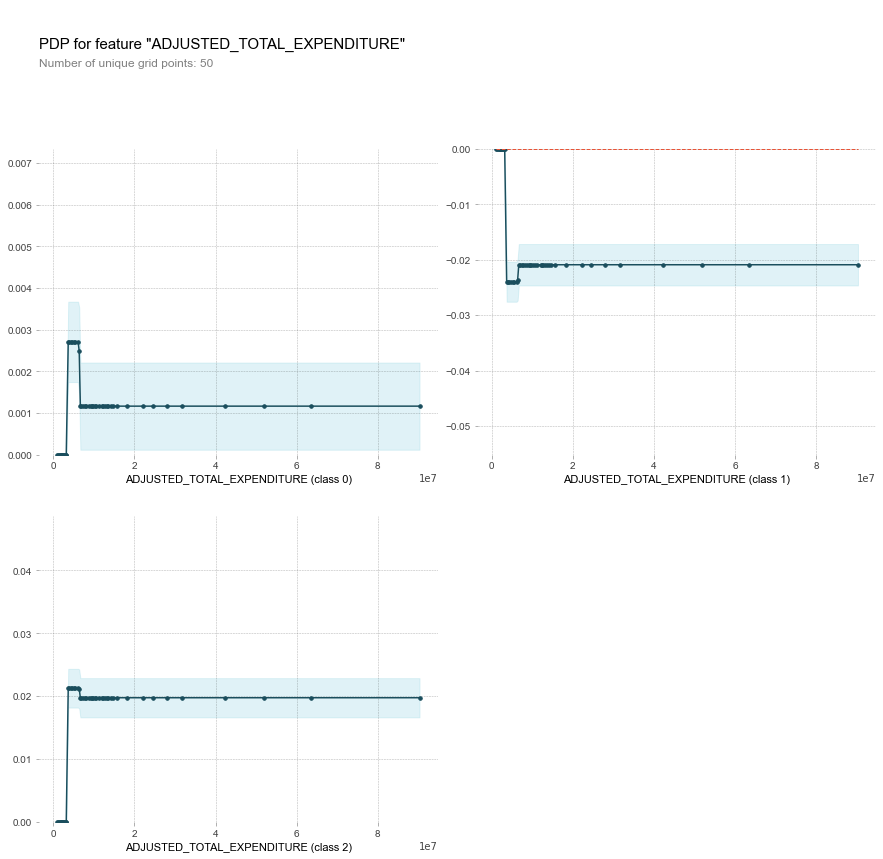

In [88]:
pdp_plot(isolated, feature_name = feature);

In [89]:
feature = '%TOTAL_EXPENDITURE_INSTRUCTION'

isolated = pdp_isolate(
    model = new_pipeline, 
    dataset = X_val_new, 
    model_features = X_val_new.columns, 
    feature = feature,
    num_grid_points = 50
)

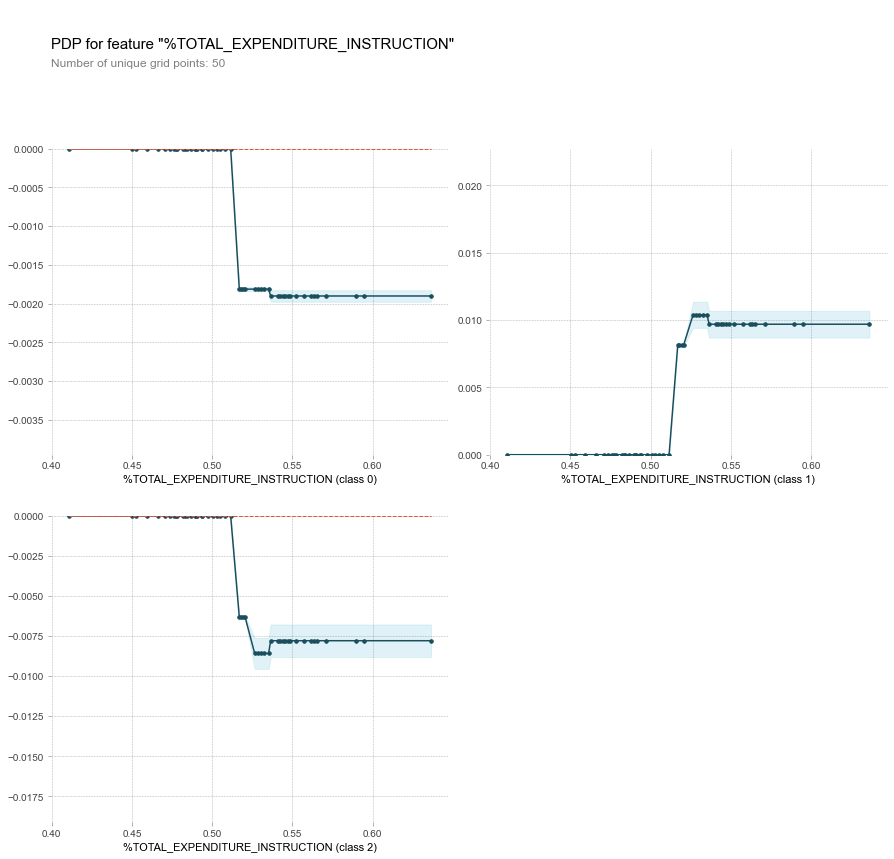

In [90]:
pdp_plot(isolated, feature_name = feature);

### Feature Interaction

In [91]:
# !pip install PDPbox

In [94]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import seaborn as sns

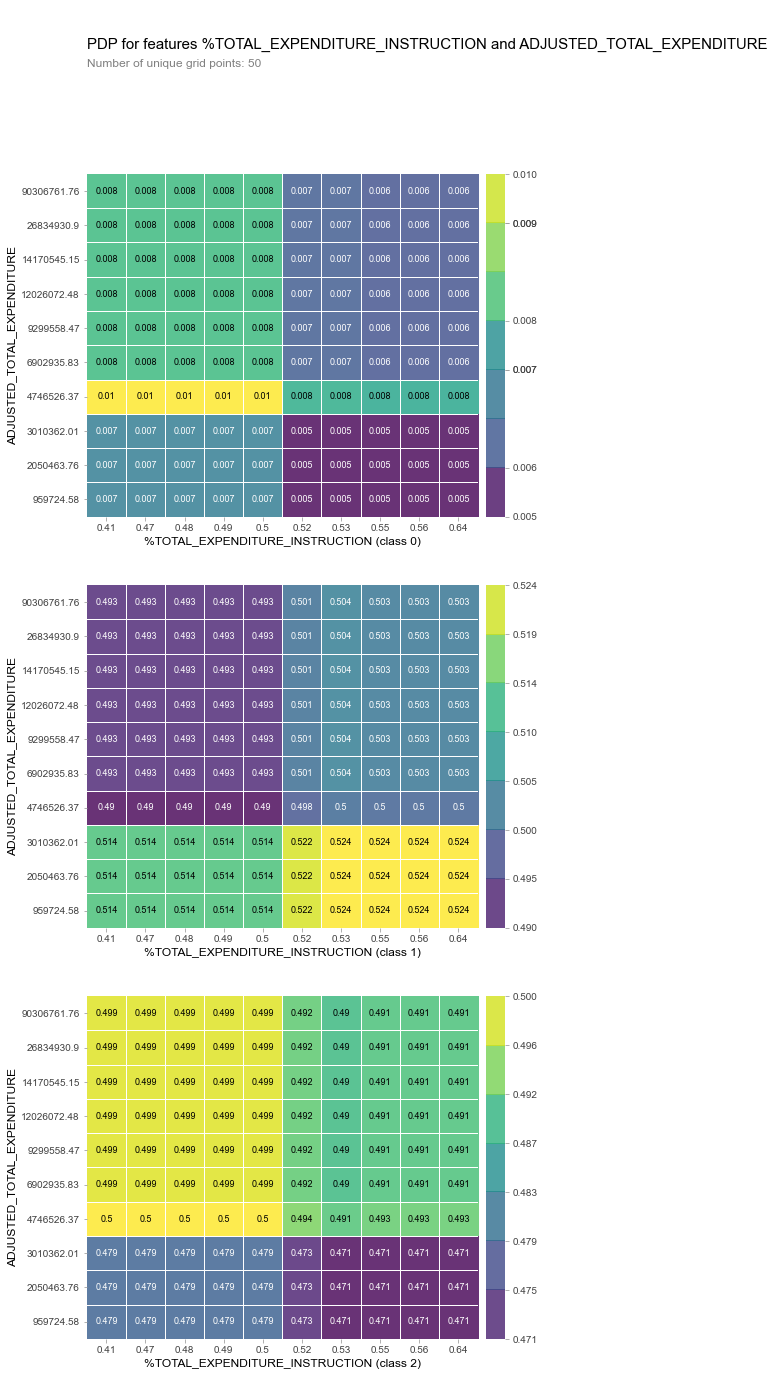

In [95]:
features= '%TOTAL_EXPENDITURE_INSTRUCTION', 'ADJUSTED_TOTAL_EXPENDITURE'
n_grids = 50


interaction = pdp_interact(
    model = new_pipeline,
    dataset = X_val_new,
    model_features = X_val_new.columns,
    features = features
)

plot_params = {
                # plot title and subtitle
                'title': 'PDP for features %s and %s' % features,
                'subtitle': "Number of unique grid points: %d" % n_grids,
                'title_fontsize': 15,
                'subtitle_fontsize': 12,
                'font_family': 'Arial',
                # matplotlib color map for ICE lines
                'line_cmap': 'Blues',
                'xticks_rotation': 45,
                # pdp line color, highlight color and line width
                'pdp_color': '#1A4E5D',
                'pdp_hl_color': '#FEDC00',
                'pdp_linewidth': 1.5,
                # horizon zero line color and with
                'zero_color': '#E75438',
                'zero_linewidth': 1,
                # pdp std fill color and alpha
                'fill_color': '#66C2D7',
                'fill_alpha': 0.2,
                # marker size for pdp line
                'markersize': 3.5,
            }

pdp_interact_plot(interaction, 
                  features, 
                  plot_type='grid',
                  x_quantile=False,
                  ncols=1,
                  plot_params = plot_params
                  );

### Shapley 

In [96]:
# !pip install shap

In [97]:
import shap

In [98]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test_new.iloc[[0]]
row

,COST_PER_STUDENT,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,ADJUSTED_TOTAL_EXPENDITURE,ENROLL,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,ADJUSTED_OTHER_EXPENDITURE
1178,10.20689,230.977423,217.04909,8.091772e+06,734974.0,0.508875,0.321904,641019.880139


In [99]:
y_test.iloc[[0]]

1178    3.0
Name: READING_PROF_8, dtype: float64

In [100]:
explainer=shap.TreeExplainer(model_rf, feature_perturbation='interventional')
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed, check_additivity = False, approximate=False)

In [101]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=row,
    link='logit'               # For classification, this returns predicted probs
)

In [102]:
#Explanations for the whole X_val dataset

explainer = shap.TreeExplainer(model_rf)

shap_values = explainer.shap_values(X_val_processed, check_additivity=False)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=X_val_processed,
    feature_names = features
)



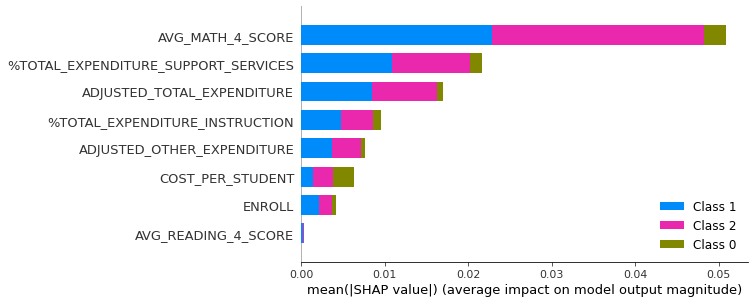

In [103]:
shap.summary_plot(shap_values, X_val_new, auto_size_plot=False)

# Making Predictions

### Feature Parameters

In [104]:
train['ENROLL'].describe()

count    2.280000e+02
mean     9.221469e+05
std      1.104017e+06
min      4.419900e+04
25%      2.516430e+05
50%      6.256170e+05
75%      9.788888e+05
max      6.307022e+06
Name: ENROLL, dtype: float64

In [105]:
min(train['ENROLL']), max(train['ENROLL'])

(44199.0, 6307022.0)

In [106]:
train['COST_PER_STUDENT'].describe()

count    228.000000
mean      10.805923
std        3.871063
min        4.504998
25%        8.089635
50%       10.290626
75%       12.364053
max       29.348515
Name: COST_PER_STUDENT, dtype: float64

In [107]:
min(train['COST_PER_STUDENT']), max(train['COST_PER_STUDENT'])

(4.504997994447996, 29.348514672277652)

In [108]:
train['AVG_MATH_4_SCORE'].describe()

count    251.000000
mean     233.307769
std       10.906790
min      192.600553
25%      226.864197
50%      236.254108
75%      241.157611
max      253.396456
Name: AVG_MATH_4_SCORE, dtype: float64

In [109]:
min(train['AVG_MATH_4_SCORE']), max(train['AVG_MATH_4_SCORE'])

(192.600553142028, 253.39645576405)

In [110]:
train['AVG_READING_4_SCORE'].describe()

count    251.000000
mean     218.185730
std        8.163315
min      178.557612
25%      213.518322
50%      219.763258
75%      223.814584
max      236.773867
Name: AVG_READING_4_SCORE, dtype: float64

In [111]:
min(train['AVG_READING_4_SCORE']), max(train['AVG_READING_4_SCORE'])

(178.557611651728, 236.773866580369)

In [112]:
train['ADJUSTED_TOTAL_EXPENDITURE'].describe()

count    2.510000e+02
mean     1.234840e+07
std      1.549713e+07
min      9.597246e+05
25%      3.069460e+06
50%      6.835090e+06
75%      1.367847e+07
max      8.909639e+07
Name: ADJUSTED_TOTAL_EXPENDITURE, dtype: float64

In [113]:
min(train['ADJUSTED_TOTAL_EXPENDITURE']), max(train['ADJUSTED_TOTAL_EXPENDITURE'])

(959724.5828644942, 89096394.78738865)

In [114]:
train['%TOTAL_EXPENDITURE_INSTRUCTION'].describe()

count    251.000000
mean       0.520349
std        0.042654
min        0.370584
25%        0.493872
50%        0.518250
75%        0.549364
max        0.644874
Name: %TOTAL_EXPENDITURE_INSTRUCTION, dtype: float64

In [115]:
min(train['%TOTAL_EXPENDITURE_INSTRUCTION']), max(train['%TOTAL_EXPENDITURE_INSTRUCTION'])

(0.37058384479865675, 0.6448742419539405)

In [116]:
train['%TOTAL_EXPENDITURE_SUPPORT_SERVICES'].describe()

count    251.000000
mean       0.297510
std        0.033039
min        0.219196
25%        0.277134
50%        0.296254
75%        0.316547
max        0.500568
Name: %TOTAL_EXPENDITURE_SUPPORT_SERVICES, dtype: float64

In [117]:
min(train['%TOTAL_EXPENDITURE_SUPPORT_SERVICES']), max(train['%TOTAL_EXPENDITURE_SUPPORT_SERVICES'])

(0.21919646406620297, 0.5005676479115797)

In [118]:
train['ADJUSTED_OTHER_EXPENDITURE'].describe()

count    2.280000e+02
mean     5.720860e+05
std      7.060246e+05
min      3.430584e+04
25%      1.472661e+05
50%      3.844172e+05
75%      6.387642e+05
max      4.479927e+06
Name: ADJUSTED_OTHER_EXPENDITURE, dtype: float64

In [119]:
min(train['ADJUSTED_OTHER_EXPENDITURE']), max(train['ADJUSTED_OTHER_EXPENDITURE'])

(34305.84378048781, 4479926.646969986)

### Define Predict Function

In [121]:
def predict(ENROLL, COST_PER_STUDENT, AVG_MATH_4_SCORE, 
            AVG_READING_4_SCORE, 
            ADJUSTED_TOTAL_EXPENDITURE,
            TOTAL_EXPENDITURE_INSTRUCTION, 
            TOTAL_EXPENDITURE_SUPPORT_SERVICES, 
            ADJUSTED_OTHER_EXPENDITURE):
    
    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[ENROLL, COST_PER_STUDENT, AVG_MATH_4_SCORE, 
               AVG_READING_4_SCORE, 
               ADJUSTED_TOTAL_EXPENDITURE,
               TOTAL_EXPENDITURE_INSTRUCTION, 
               TOTAL_EXPENDITURE_SUPPORT_SERVICES,
               ADJUSTED_OTHER_EXPENDITURE]], 
        columns=['ENROLL','COST_PER_STUDENT','AVG_MATH_4_SCORE', 
                 'AVG_READING_4_SCORE', 
                 'ADJUSTED_TOTAL_EXPENDITURE',
                 '%TOTAL_EXPENDITURE_INSTRUCTION', 
                 '%TOTAL_EXPENDITURE_SUPPORT_SERVICES', 
                 'ADJUSTED_OTHER_EXPENDITURE'])
    
    # Get the model's prediction
    pred = model_rf.predict(df)[0]
    
    return f'{pred}'


In [122]:
predict(50000, 10, 240, 200, 60000000, 0.5, 0.3, 2000000)

'2.0'

In [123]:
predict(70000, 15, 240, 200, 80000000, 0.5, 0.3, 4000000)

'2.0'

# Pickle the Pipeline

In [124]:
# The pickle
# from joblib import dump
# dump(model_rf, 'pipeline.joblib', compress=True)

In [125]:
#What version did I use?
import joblib
import sklearn
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')

joblib==1.0.0
scikit-learn==0.22.1
